<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ready-for-Machine-Learning" data-toc-modified-id="Ready-for-Machine-Learning-1">Ready for Machine Learning</a></span></li></ul></div>

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [364]:
df = pd.read_csv('employee-attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [366]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [367]:
cols = list(df.columns)
cols

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

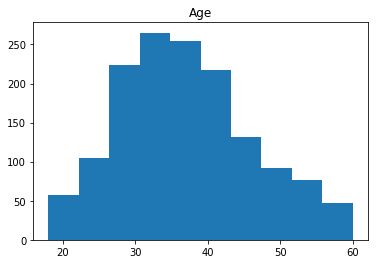

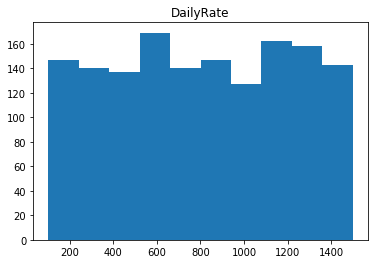

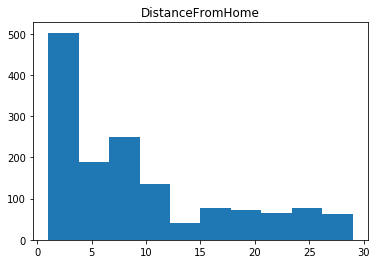

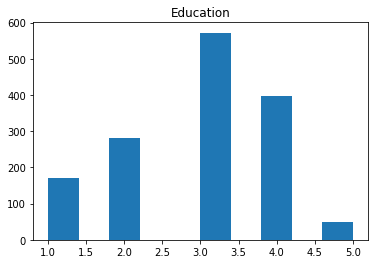

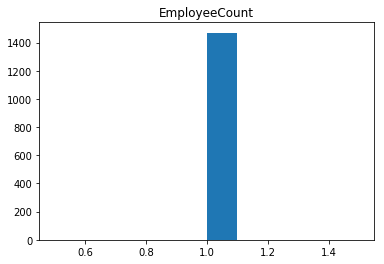

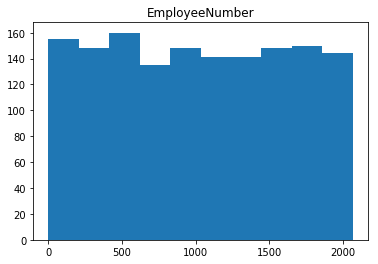

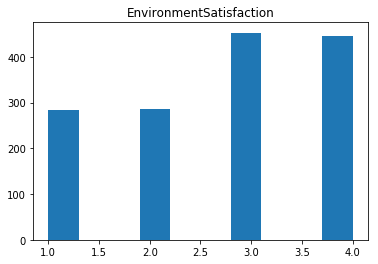

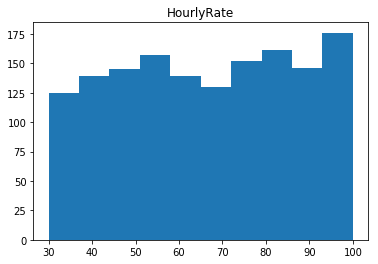

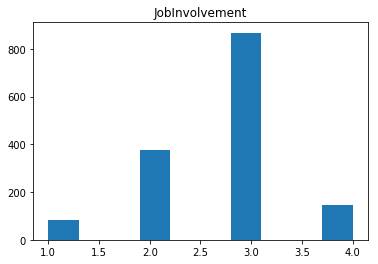

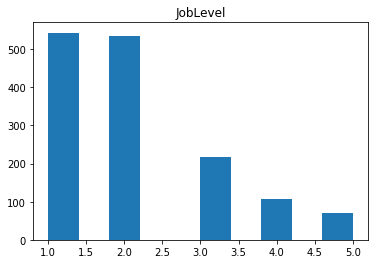

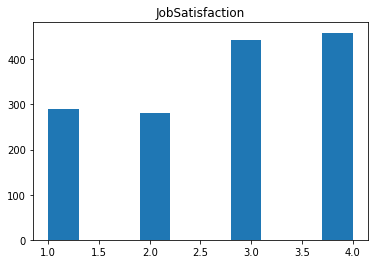

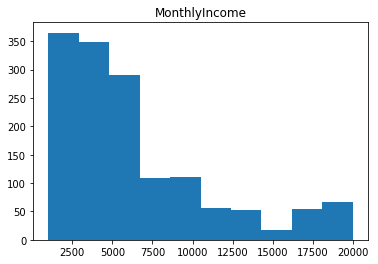

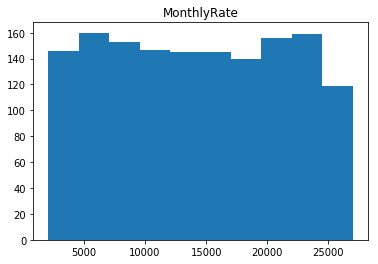

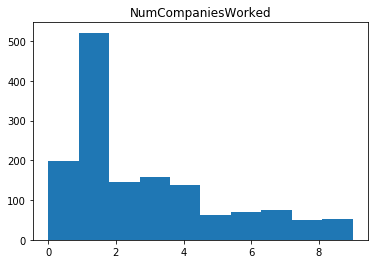

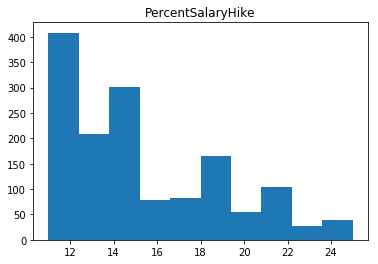

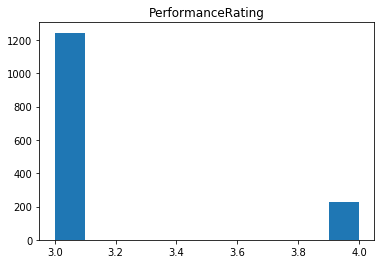

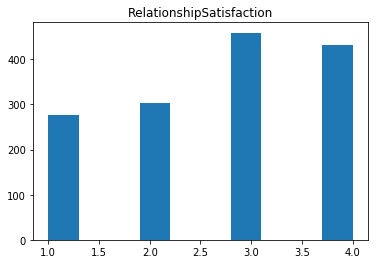

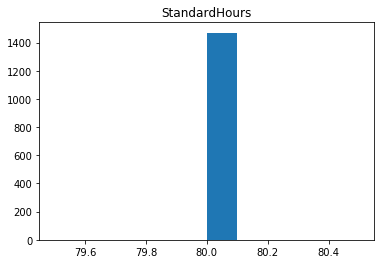

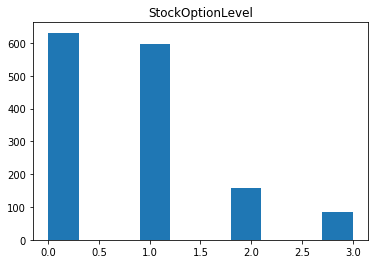

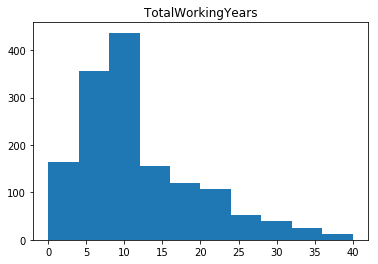

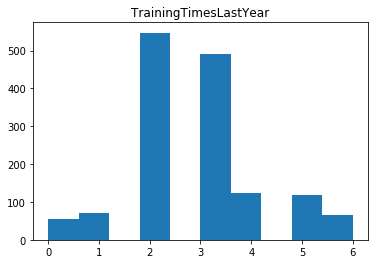

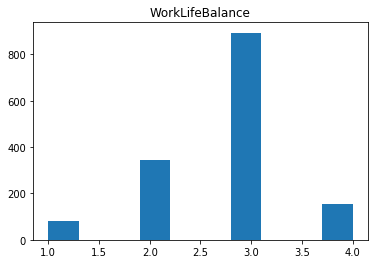

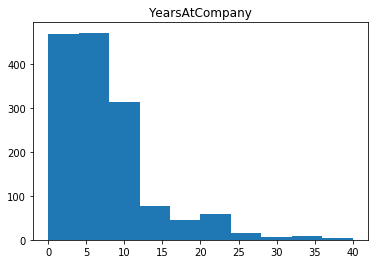

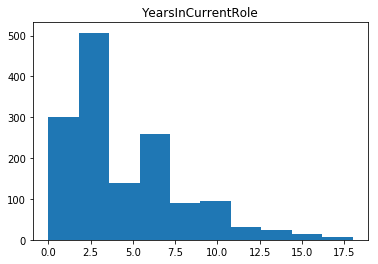

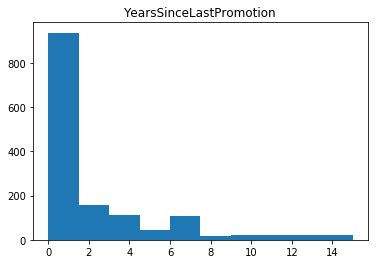

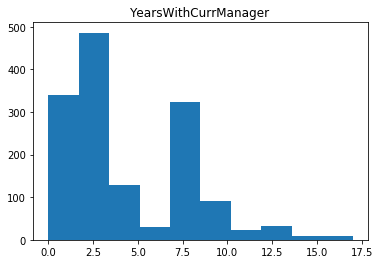

In [368]:
for col in cols:
    if df[col].dtype != 'int64':
        pass
    else:
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [369]:
drops = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = df.drop(columns=drops)

In [370]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [371]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [373]:
df.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)
df.Gender.replace({'Male': 1, 'Female': 0}, inplace=True)
df.MaritalStatus.replace({'Married': 2, 'Single': 1, 'Divorced': 0}, inplace=True)
df.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)

In [374]:
cats = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

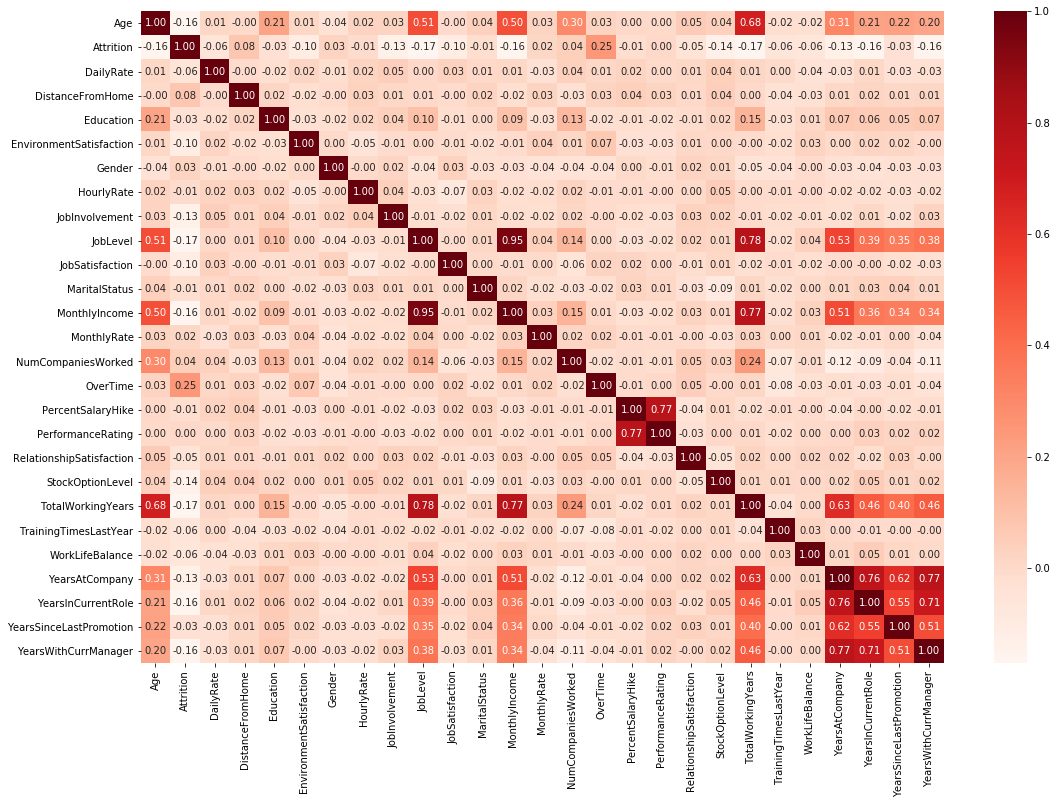

In [375]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f');

In [376]:
corr = ['JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'YearsInCurrentRole', 'Age']
df.drop(columns=corr, inplace=True)

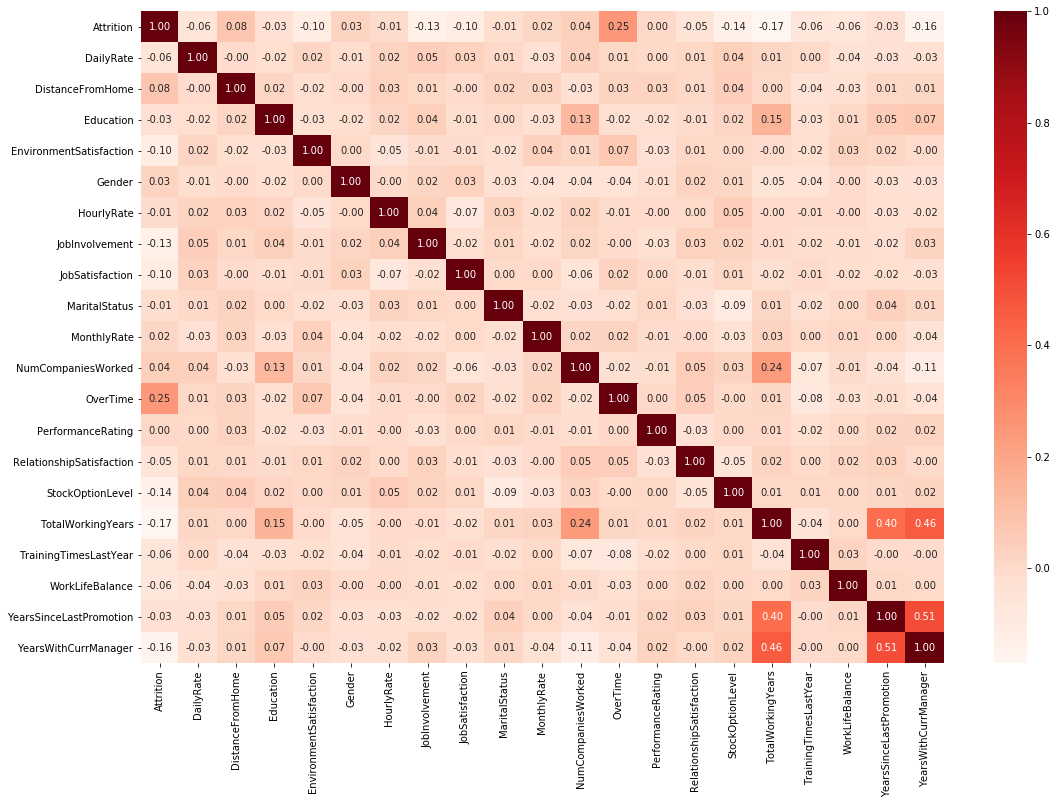

In [377]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f');

In [378]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Attrition                            1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobSatisfaction                      1470 non-null int64
MaritalStatus                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1

In [379]:
df.head()

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1102,1,2,2,0,94,3,4,1,...,0,0,0,0,0,0,0,0,1,0
1,0,279,8,1,3,1,61,2,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,1373,2,2,4,1,92,2,3,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1392,3,4,4,0,56,3,3,2,...,0,0,0,0,0,0,0,1,0,0
4,0,591,2,1,1,1,40,3,2,2,...,0,0,0,1,0,0,0,0,0,0


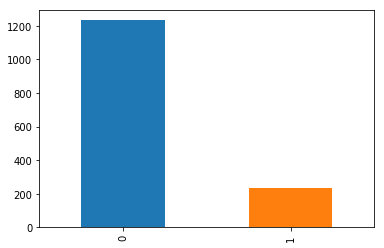

In [380]:
df.Attrition.value_counts().plot(kind="bar")

# Ready for Machine Learning

In [381]:
dtclf = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
gbclf = GradientBoostingClassifier()
adaclf = AdaBoostClassifier()
bagclf = BaggingClassifier() 

In [383]:
target = df.Attrition
features = df.drop(columns='Attrition')

In [389]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1102, 41) (1102,)
(368, 41) (368,)


In [390]:
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [420]:
train_preds = dtclf.predict(X_train)

In [392]:
y_preds = dtclf.predict(X_test)

In [422]:
y_train.shape, y_preds.shape, y_test.shape, train_preds.shape

((1102,), (368,), (368,), (1102,))

In [429]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.7608695652173914

Test Recall=  0.30357142857142855

Test Precision=  0.25757575757575757

F1-Score=  0.2786885245901639


In [430]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       312
           1       0.26      0.30      0.28        56

   micro avg       0.76      0.76      0.76       368
   macro avg       0.56      0.57      0.57       368
weighted avg       0.78      0.76      0.77       368



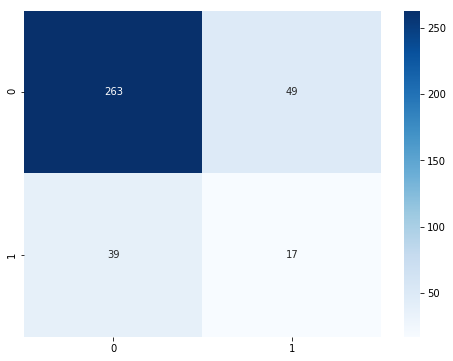

In [431]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [433]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [439]:
y_preds = rfclf.predict(X_test)

In [441]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8369565217391305

Test Recall=  0.03571428571428571

Test Precision=  0.25

F1-Score=  0.0625


In [442]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       312
           1       0.25      0.04      0.06        56

   micro avg       0.84      0.84      0.84       368
   macro avg       0.55      0.51      0.49       368
weighted avg       0.76      0.84      0.78       368



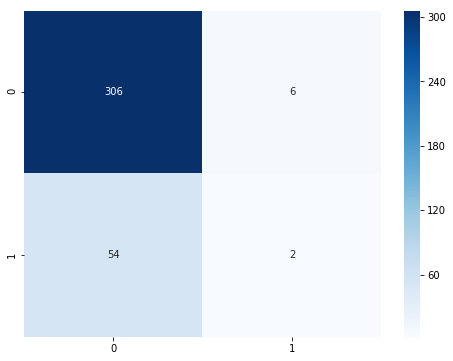

In [443]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [444]:
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [445]:
y_preds = gbclf.predict(X_test)

In [446]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8586956521739131

Test Recall=  0.2857142857142857

Test Precision=  0.5714285714285714

F1-Score=  0.38095238095238093


In [447]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       312
           1       0.57      0.29      0.38        56

   micro avg       0.86      0.86      0.86       368
   macro avg       0.73      0.62      0.65       368
weighted avg       0.84      0.86      0.84       368



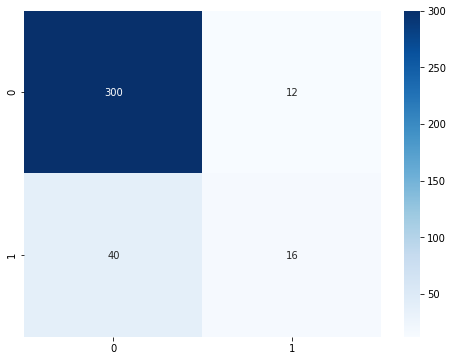

In [448]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [449]:
adaclf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [450]:
y_preds = adaclf.predict(X_test)

In [451]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8722826086956522

Test Recall=  0.35714285714285715

Test Precision=  0.6451612903225806

F1-Score=  0.4597701149425288


In [452]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       312
           1       0.65      0.36      0.46        56

   micro avg       0.87      0.87      0.87       368
   macro avg       0.77      0.66      0.69       368
weighted avg       0.86      0.87      0.86       368



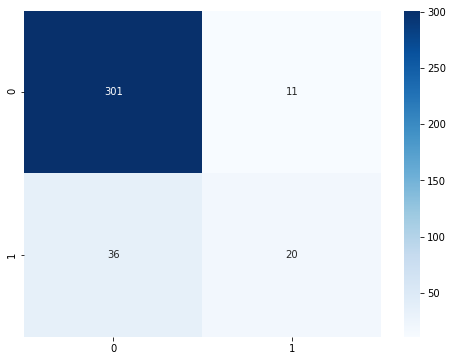

In [453]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [459]:
bagclf.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [460]:
y_preds = bagclf.predict(X_test)

In [461]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8505434782608695

Test Recall=  0.23214285714285715

Test Precision=  0.52

F1-Score=  0.32098765432098764


In [462]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       312
           1       0.52      0.23      0.32        56

   micro avg       0.85      0.85      0.85       368
   macro avg       0.70      0.60      0.62       368
weighted avg       0.82      0.85      0.83       368



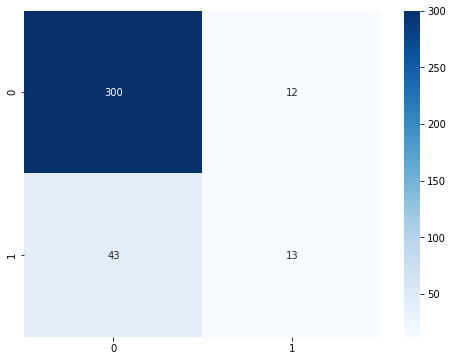

In [463]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');